<a href="https://colab.research.google.com/github/lgelbman/DataScienceHW4/blob/master/DataScienceHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading in the dataset, EDA, and cleaning the data

In [1]:
import pandas as pd

url_of_csv = "https://raw.githubusercontent.com/lgelbman/DataScienceHW4/master/ks-projects-201801.csv"
data = pd.read_csv(url_of_csv)

In [2]:
display("size of data set: {}".format(len(data)))

data.info()

'size of data set: 378661'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


There are 14 columns:

ID (project id): numeric data, irrelevent for classifier.

name: textual data, irrelevent for classifier.

category and main_category (represents category and subcategory of project): categorical data
currency: categorical, currency used for the project.


In [3]:
display(data.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


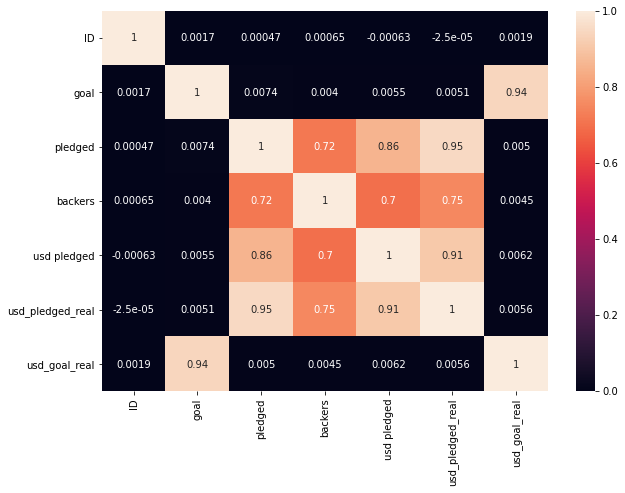

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt



#modified from https://colab.research.google.com/drive/1JXcNCbxr_1-zteBM_x-algmhAoYOUVKG#scrollTo=DzlMAoEwDwkl
corrMatrix = data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

There are only (significant) obvious correlations like: 
  higher amount pledged <=> larger number of backers

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

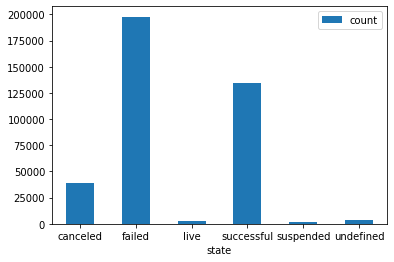

In [5]:
#Get a pd series frequency distribution for each state a project can be in (successful, failed...)
state_count = data.groupby('state')['ID'].nunique()

#displays counts
display(state_count)

#convert series to dataframe
state_count_df = pd.DataFrame({'state' : state_count.index, 'count' : state_count.values})

#displays bar chart
state_count_df.plot.bar(x='state', y='count', rot=0)

The majority of the dataset is either in a successful or failed state. Therefore, it seems reasonable to drop the data in other states in order to classify a project as either success or failure. In addition, since "successfull" and "failed" projects are of a similar magnitude, there shouldnt be a bias in a regression that predicts the amount raised (like if the dataset contained mostly failed projects)

In [6]:
is_successful = data['state'] == 'successful'
data[is_successful]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378642,999929142,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Tabletop Games,Games,EUR,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,successful,35,FR,66.72,1452.47,1165.70
378644,999934908,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,successful,120,US,6169.00,6169.00,3500.00
378646,999943841,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,successful,31,US,1732.02,1732.02,950.00
378651,999969812,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,successful,78,CA,5019.92,4983.69,4529.81


#First attempt:

The following regression (All in one code cell) is incorrect because it assigns a number to each category of the categorical variables. However, the regression score is oly slightly lower than the second attempt (~.5), possibly because of the numerical features.

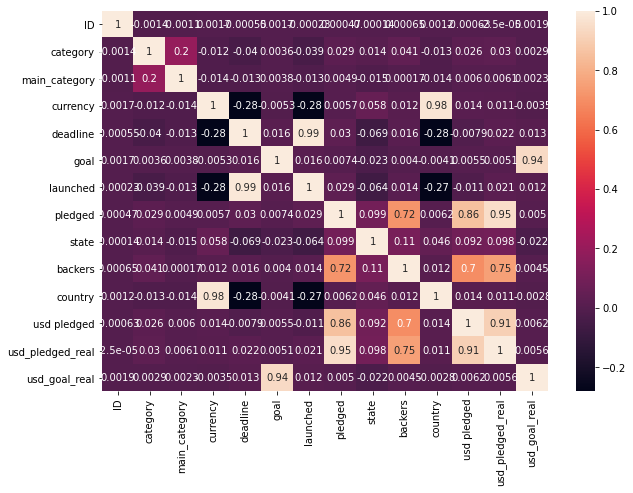

378661 total rows in data set.
3801 rows containing missing values


0.49692967999689464

0.5711987952860627

0.4969296799968928

0.5711987951272411

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
copy = data.copy()
copy['currency'] = label_encoder.fit_transform(copy['currency'])
copy['deadline'] = label_encoder.fit_transform(copy['deadline'])
copy['category'] = label_encoder.fit_transform(copy['category'])
copy['main_category'] = label_encoder.fit_transform(copy['main_category'])
copy['launched'] = label_encoder.fit_transform(copy['launched'])
copy['state'] = label_encoder.fit_transform(copy['state'])
copy['country'] = label_encoder.fit_transform(copy['country'])


#modified from https://colab.research.google.com/drive/1JXcNCbxr_1-zteBM_x-algmhAoYOUVKG#scrollTo=DzlMAoEwDwkl
corrMatrix = copy.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

print("{} total rows in data set.".format(data.shape[0]))
print("{} rows containing missing values".format(data.isnull().sum().sum()))

copy = copy.dropna()

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


x = copy[['category', 'currency', 'goal', 'deadline', 'country', 'launched', 'backers']].to_numpy()
y = copy['pledged'].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


regression = LinearRegression().fit(x_train, y_train)
display(regression.score(x_train, y_train))
display(regression.score(x_test, y_test))

ridge_regression = Ridge(alpha=1.0).fit(x_train, y_train)
display(ridge_regression.score(x_train, y_train))
display(ridge_regression.score(x_test, y_test))


#One hot encoding


Make a copy of the dataframe

In [8]:
copy_for_one_hot_encoding = data.copy()

Most of the dataset is not missing values so I droped the null rows.

In [9]:
print("{} total rows in data set.".format(data.shape[0]))
print("{} rows containing missing values".format(data.isnull().sum().sum()))

copy = copy.dropna()

378661 total rows in data set.
3801 rows containing missing values


Encode the relevant categorical variables as a one hot encoding in the copied dataframe.

In [10]:

copy_for_one_hot_encoding = copy_for_one_hot_encoding.dropna()

categorical_columns = ['category', 'main_category', 'currency', 'country']

for column in categorical_columns:
  column_as_one_hot_encoding = pd.get_dummies(copy_for_one_hot_encoding[column])
  copy_for_one_hot_encoding[column_as_one_hot_encoding.columns] = column_as_one_hot_encoding


copy_for_one_hot_encoding = copy_for_one_hot_encoding.drop(categorical_columns, axis=1)


###Analysis of data after encoding.

In [11]:
print('shape of dataframe: {}'.format(copy_for_one_hot_encoding.shape))

display(copy_for_one_hot_encoding.head())

shape of dataframe: (374860, 206)


,ID,name,deadline,goal,launched,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,Art,Art Books,Audio,Bacon,Blues,Calendars,Camera Equipment,Candles,Ceramics,Children's Books,Childrenswear,Chiptune,Civic Design,Classical Music,Comedy,Comic Books,Comics,Community Gardens,Conceptual Art,...,Workshops,World Music,Young Adult,Zines,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,0.0,0.0,1533.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,100.0,2421.0,30000.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,220.0,220.0,45000.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,1.0,1.0,5000.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,1283.0,1283.0,19500.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
#remove block
print("{} total rows in data set.".format(data.shape[0]))
print("{} rows containing missing values".format(data.isnull().sum().sum()))

copy = copy.dropna()

378661 total rows in data set.
3801 rows containing missing values


#Split the encoded-copied dataframe into Train and Test set.

The input 'X' is a tuple of the features: 'backers' and the above one hot encoding of 'category', 'main_category', 'currency', 'country.'

The output 'Y' represents the amount pledged.

These are used to for a regression that uses X to predict Y.

In [13]:
from sklearn.model_selection import train_test_split

x = copy_for_one_hot_encoding.drop(['ID', 'name', 'deadline', 'launched', 'pledged', 'state', 'usd pledged', 'usd_pledged_real'], axis=1)

x = x.to_numpy()

y = copy_for_one_hot_encoding['pledged']

y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Linear Regression


In [14]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(x_train, y_train)

#Results

In [15]:
display(regression.score(x_train, y_train))

display(regression.score(x_test, y_test))

0.5056957718771217

0.5809710864640074